In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from skimage import io

In [3]:
transaction_train = pd.read_csv('transactions_train.csv')

In [4]:
print(min(transaction_train['t_dat']),max(transaction_train['t_dat']))

2018-09-20 2020-09-22


In [5]:
df = transaction_train[transaction_train['t_dat']>='2020-09-01']

In [6]:
len(df)

798269

In [7]:
articles = pd.read_csv('articles.csv')
df = df.merge(articles, on='article_id')

In [64]:
a = pd.read_csv('articles.csv')

In [65]:
a.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [8]:
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2020-09-01,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0.013542,1,777148,Thomas PREMIUM,252,Sweater,Garment Upper body,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,"Slightly boxy jumper knitted in a soft, fluffy..."
1,2020-09-03,5ac5e1825104ed5fe3333e75b9337eebc4b45ad761056b...,777148006,0.013542,1,777148,Thomas PREMIUM,252,Sweater,Garment Upper body,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,"Slightly boxy jumper knitted in a soft, fluffy..."
2,2020-09-06,0dcf3023ea1992a78a1fcc769b6befc956f7308186496d...,777148006,0.013542,1,777148,Thomas PREMIUM,252,Sweater,Garment Upper body,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,"Slightly boxy jumper knitted in a soft, fluffy..."
3,2020-09-06,28b30893bbe946358103760387e3dcd09fdb7b077a942f...,777148006,0.042356,2,777148,Thomas PREMIUM,252,Sweater,Garment Upper body,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,"Slightly boxy jumper knitted in a soft, fluffy..."
4,2020-09-10,278f23c7fac720c2b96b25455d640860bdfa8bb3c867cf...,777148006,0.013542,1,777148,Thomas PREMIUM,252,Sweater,Garment Upper body,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,"Slightly boxy jumper knitted in a soft, fluffy..."


In [9]:
#number of unique values in each property
df.nunique().sort_values(ascending=True).to_frame().T

,sales_channel_id,index_group_name,index_group_no,perceived_colour_value_id,perceived_colour_value_name,index_name,index_code,product_group_name,perceived_colour_master_name,perceived_colour_master_id,...,product_type_name,product_type_no,department_name,department_no,price,detail_desc,product_code,prod_name,article_id,customer_id
0,2,5,5,7,7,10,10,17,20,20,...,119,120,224,268,4278,13029,13751,14111,26252,189510


In [10]:
#Choose features to build feature space
features = ['product_group_name', 'colour_group_name', 'section_name', 'department_name', 'graphical_appearance_name']

df1 = df[['customer_id', 'article_id'] + features]
dummies_df = pd.get_dummies(df1, columns=features)
dummies_df.head()

,customer_id,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Fun,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,...,graphical_appearance_name_Neps,graphical_appearance_name_Other pattern,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Sequin,graphical_appearance_name_Slub,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent,graphical_appearance_name_Treatment
0,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,777148006,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5ac5e1825104ed5fe3333e75b9337eebc4b45ad761056b...,777148006,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0dcf3023ea1992a78a1fcc769b6befc956f7308186496d...,777148006,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,28b30893bbe946358103760387e3dcd09fdb7b077a942f...,777148006,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,278f23c7fac720c2b96b25455d640860bdfa8bb3c867cf...,777148006,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
minimum_items = 2
groupby_customer = dummies_df.groupby('customer_id')

l = []
cutomer_ids = []
article_ids = []
for key in groupby_customer.groups.keys():
    temp = groupby_customer.get_group(key) # get all the transactions for that customer
    if temp.article_id.nunique() >= minimum_items: #if minimum 2 items purchased
        l.append(temp.drop('article_id', axis=1).sum(numeric_only=True).values)
        cutomer_ids.append(key)
        article_ids.extend(temp.article_id.values.tolist())

In [15]:
user_feature = pd.DataFrame(l, columns = dummies_df.columns[2:])
normalized_user_feature = user_feature.div(user_feature.sum(axis=1), axis=0)
normalized_user_feature.insert(0, 'customer_id', cutomer_ids)
normalized_user_feature = normalized_user_feature.set_index('customer_id')
normalized_user_feature


,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Fun,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,product_group_name_Items,product_group_name_Nightwear,...,graphical_appearance_name_Neps,graphical_appearance_name_Other pattern,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Sequin,graphical_appearance_name_Slub,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent,graphical_appearance_name_Treatment
customer_id,,,,,,,,,,,,,,,,,,,,,
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.00,0.0,0.000000
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,0.000000,0.0,0.0,0.0,0.000000,0.100000,0.100000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.140000,0.00,0.0,0.000000
0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf4672f30b3e622fec55,0.000000,0.0,0.0,0.0,0.044444,0.066667,0.088889,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.088889,0.00,0.0,0.000000
00040239317e877c77ac6e79df42eb2633ad38fcac09fc0094e549180ddc201c,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000
000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed6396773839f6bf71a9,0.000000,0.0,0.0,0.0,0.000000,0.145455,0.054545,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.054545,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd0248a95c2e49fee876ff93598e2e20839e51b9b7678aab75d9e8f9f3c6c8,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.033333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.00,0.0,0.000000
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,0.000000,0.0,0.0,0.0,0.000000,0.100000,0.100000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.10,0.0,0.000000
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e02ce5d1e58a8f700b,0.000000,0.0,0.0,0.0,0.000000,0.072727,0.127273,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.127273,0.00,0.0,0.018182


In [16]:
item_feature = dummies_df.drop_duplicates(subset='article_id')
item_feature = item_feature[item_feature.article_id.isin(article_ids)].drop('customer_id', axis=1)
item_feature = item_feature.set_index('article_id')
item_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Fun,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,product_group_name_Items,product_group_name_Nightwear,...,graphical_appearance_name_Neps,graphical_appearance_name_Other pattern,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Sequin,graphical_appearance_name_Slub,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent,graphical_appearance_name_Treatment
article_id,,,,,,,,,,,,,,,,,,,,,
777148006,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
835801001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
923134005,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
865929003,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
863646004,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737994021,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
533261032,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
865792012,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
scores = normalized_user_feature.dot(item_feature.T)
scores

article_id,777148006,835801001,923134005,865929003,863646004,574109042,797079002,816586006,945995002,523490007,...,810737015,823685002,746994009,554450034,812746001,737994021,533261032,865792012,772659001,807775001
customer_id,,,,,,,,,,,,,,,,,,,,,
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,0.000000,0.200000,0.400000,0.000000,0.200000,0.400000,0.300000,0.200000,0.200000,0.200000,...,0.000000,0.000000,0.300000,0.800000,0.200000,0.300000,0.200000,0.200000,0.400000,0.500000
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,0.280000,0.400000,0.420000,0.300000,0.380000,0.260000,0.060000,0.120000,0.140000,0.140000,...,0.000000,0.020000,0.140000,0.280000,0.140000,0.140000,0.240000,0.120000,0.280000,0.300000
0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf4672f30b3e622fec55,0.088889,0.177778,0.155556,0.133333,0.177778,0.400000,0.333333,0.333333,0.355556,0.088889,...,0.022222,0.000000,0.111111,0.400000,0.088889,0.111111,0.177778,0.111111,0.155556,0.355556
00040239317e877c77ac6e79df42eb2633ad38fcac09fc0094e549180ddc201c,0.200000,0.200000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.000000,...,0.000000,0.000000,0.600000,0.000000,0.000000,0.200000,0.200000,0.100000,0.000000,0.000000
000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed6396773839f6bf71a9,0.054545,0.109091,0.200000,0.054545,0.109091,0.181818,0.254545,0.200000,0.200000,0.054545,...,0.000000,0.000000,0.436364,0.309091,0.054545,0.327273,0.109091,0.218182,0.200000,0.218182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd0248a95c2e49fee876ff93598e2e20839e51b9b7678aab75d9e8f9f3c6c8,0.100000,0.300000,0.266667,0.100000,0.300000,0.233333,0.000000,0.033333,0.033333,0.200000,...,0.033333,0.400000,0.033333,0.233333,0.200000,0.033333,0.233333,0.033333,0.233333,0.333333
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,0.100000,0.200000,0.200000,0.100000,0.200000,0.200000,0.000000,0.100000,0.100000,0.100000,...,0.000000,0.100000,0.100000,0.200000,0.100000,0.100000,0.200000,0.100000,0.200000,0.400000
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e02ce5d1e58a8f700b,0.290909,0.436364,0.272727,0.236364,0.454545,0.254545,0.036364,0.127273,0.127273,0.127273,...,0.018182,0.018182,0.145455,0.200000,0.127273,0.109091,0.254545,0.072727,0.200000,0.272727


In [18]:
def get_rcmnd(customer_id):
    cutomer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)   
    return ordered, customer_prev_items

In [69]:
#show recommendation for a specific customer
k = 6 # number of articles to recommend
customer_id = scores.index[80] # enter the index number of the custormer id
rcmnds, prev_items = get_rcmnd(customer_id)
rcmnds = rcmnds.index.values[:k]
path = "/Users/sanchitgarg/Documents/h-and-m-personalized-fashion-recommendations/images"


In [70]:
#rcmnds

In [59]:
def plot_prev():
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, len(prev_items), i)
        plt.imshow(image)

In [60]:
def plot_rcmnd():
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(rcmnds, range(1, k+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, k, i)
        plt.imshow(image)

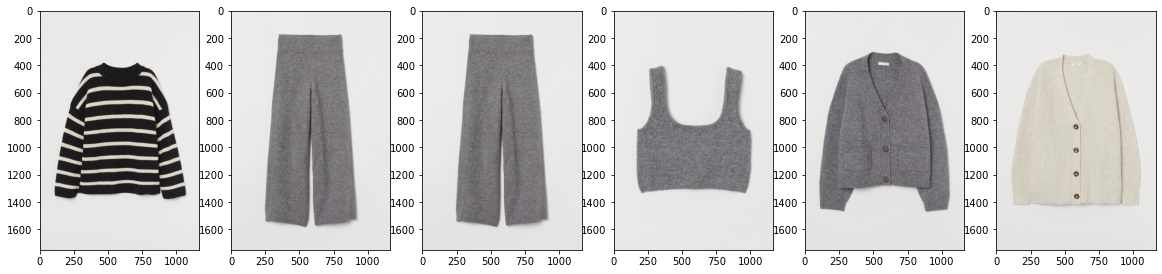

In [61]:
plot_prev()

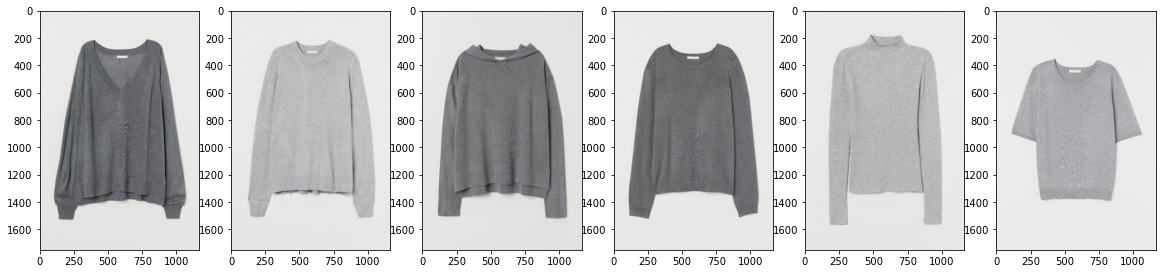

In [62]:
plot_rcmnd()